## Using data from Pima Indians create model to determine if person will be diabetic or not based on indicators provided

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale
import seaborn as sns; sns.set()

## download and read csv file into a dataframe, inspect data


In [2]:
pima = pd.read_csv('diabetes.csv')

print(pima.head())
pima.info()
print(pima.describe())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin    

## There are no missing values but insulin values cannot be 0, fill in with mean of available insulin values

In [3]:
avg_insulin= (np.mean(pima['Insulin']))
print(avg_insulin)
pima[pima['Insulin']== 0]= avg_insulin
pima.info()
pima['Outcome']= pima['Outcome'].astype('int')
pima.info()


79.79947916666667
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null float64
Glucose                     768 non-null float64
BloodPressure               768 non-null float64
SkinThickness               768 non-null float64
Insulin                     768 non-null float64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null float64
Outcome                     768 non-null float64
dtypes: float64(9)
memory usage: 54.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null float64
Glucose                     768 non-null float64
BloodPressure               768 non-null float64
SkinThickness               768 non-null float64
Insulin                     768 non-null float64
BMI                         768 non-null float6

## Visually inspect the data

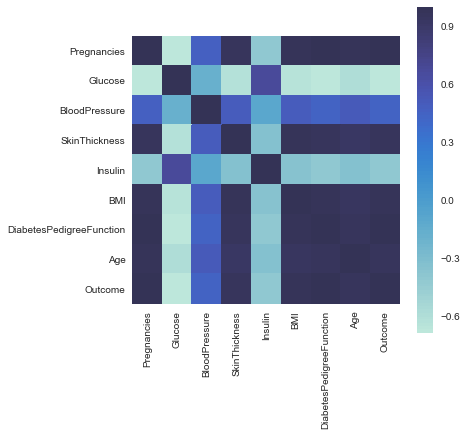

In [4]:
cm = pima.corr()
plt.figure(figsize = (6,6))
sns.heatmap(cm, square=True, center=1.5)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

## data is clean, setup variables for modeling


In [5]:
X= pima.drop(['Outcome'], axis=1).values
X_scaled= scale(X)
y= pima['Outcome'].values
print(X.shape, y.shape)

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)
Xs_train, Xs_test, ys_train, ys_test= train_test_split(X_scaled, y, test_size=0.3, random_state=21, stratify=y)


(768, 8) (768,)


## Using Scikitlearn algorithm cheat sheet choose to Model using SCV


In [6]:
svm= SVC()
svm.fit(X_train, y_train)
y_pred= svm.predict(X_test)
cv_results= cross_val_score(svm, X_test, y_test, cv=10)

# print('Test set predicitons: \n {}'.format(y_pred))
print('Score of SVC {}' .format(svm.score(X_test, y_test)))
print('Cross_Val Score of SVC, {}' .format(cv_results))
print('Mean of Cross_val score: {}'.format(np.mean(cv_results)))

Score of SVC 0.8311688311688312
Cross_Val Score of SVC, [0.83333333 0.83333333 0.83333333 0.82608696 0.82608696 0.82608696
 0.82608696 0.82608696 0.82608696 0.85714286]
Mean of Cross_val score: 0.8313664596273291


## Normalize effect of magnitudes of data by scaling the x variable


In [7]:
svm= SVC()
svm.fit(Xs_train, ys_train)
ys_pred= svm.predict(Xs_test)
cv_results= cross_val_score(svm, Xs_test, ys_test, cv=10)

# print('Test set predicitons: \n {}'.format(ysvm.fit(X_train, y_train)
print('Score of SVC, X_scaled  {}' .format(svm.score(Xs_test, ys_test)))
print('Cross_Val Score of SVC {}' .format(cv_results))
print('Mean of Cross_val score: {}'.format(np.mean(cv_results)))

Score of SVC, X_scaled  0.9004329004329005
Cross_Val Score of SVC [0.875      0.875      0.95833333 0.95652174 0.95652174 0.86956522
 0.91304348 0.7826087  0.82608696 0.76190476]
Mean of Cross_val score: 0.8774585921325052


## Model using another method- KNeighborsClassifier


In [8]:
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred= knn.predict(X_test)
cv_results= cross_val_score(knn, X_test, y_test, cv=10)

# print('Test set predicitons: \n {}'.format(y_pred))
print('Score of KNN, n_neigh=5 {}' .format(knn.score(X_test, y_test)))
print('Cross_Val Score of KNN, n_neigh=5 {}' .format(cv_results))
print('Mean of Cross_val score: {}'.format(np.mean(cv_results)))

Score of KNN, n_neigh=5 0.8398268398268398
Cross_Val Score of KNN, n_neigh=5 [0.83333333 0.91666667 0.91666667 0.95652174 0.95652174 0.82608696
 0.82608696 0.7826087  0.7826087  0.80952381]
Mean of Cross_val score: 0.8606625258799172


## Model using KNeighborsClassifier with scaled X


In [9]:
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(Xs_train, ys_train)
ys_pred= knn.predict(Xs_test)
cv_results= cross_val_score(knn, Xs_test, ys_test, cv=10)

# print('Test set predicitons: \n {}'.format(y_pred))
print('Score of KNN, n_neigh=5, X_scaled {}' .format(knn.score(Xs_test, ys_test)))
print('Cross_Val Score of KNN, n_neigh=5, x_scaled {}' .format(cv_results))
print('Mean of Cross_val score: {}'.format(np.mean(cv_results)))

Score of KNN, n_neigh=5, X_scaled 0.8701298701298701
Cross_Val Score of KNN, n_neigh=5, x_scaled [0.91666667 0.91666667 0.95833333 0.95652174 0.95652174 0.7826087
 0.82608696 0.7826087  0.7826087  0.85714286]
Mean of Cross_val score: 0.8735766045548654


## Determine the accuracy for a range of values for k, x unscaled


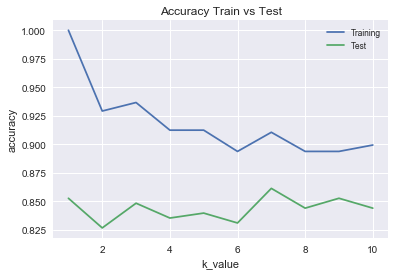

In [10]:
neighbors= np.arange(1, 11)
train_accuracy= np.empty(len(neighbors))
test_accuracy= np.empty(len(neighbors))

for i, k in enumerate(neighbors) :
    knn= KNeighborsClassifier(n_neighbors= k)
    knn.fit(X_train, y_train)
    train_accuracy[i]=knn.score(X_train, y_train)
    test_accuracy[i]=knn.score(X_test, y_test)

plt.plot(neighbors, train_accuracy, label='Training')
plt.plot(neighbors, test_accuracy, label='Test')
plt.xlabel('k_value')
plt.ylabel('accuracy')
plt.title('Accuracy Train vs Test')
plt.legend(loc='best', fontsize='small', markerscale=0.7)
plt.show()

## Run KNN again with optimized n value

In [11]:
#Model using KNeighborsClassifier n_neighbors = 7
knn= KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred= knn.predict(X_test)
cv_results= cross_val_score(knn, X_test, y_test, cv=10)

# print('Test set predicitons: \n {}'.format(y_pred))
print('Score of KNN, n_neigh=7 {}' .format(knn.score(X_test, y_test)))
print('Cross_Val Score of KNN, n_neigh=7 {}' .format(cv_results))
print('Mean of Cross_val score: {}'.format(np.mean(cv_results)))

Score of KNN, n_neigh=7 0.8614718614718615
Cross_Val Score of KNN, n_neigh=7 [0.83333333 0.91666667 0.95833333 0.95652174 0.91304348 0.82608696
 0.82608696 0.73913043 0.7826087  0.85714286]
Mean of Cross_val score: 0.8608954451345756


## Determine the accuracy for a range of values for k, x scaled


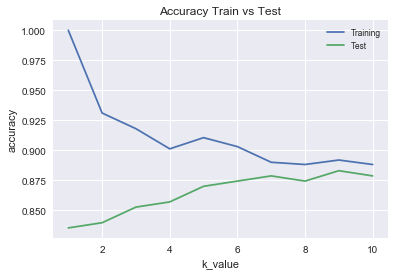

In [12]:
neighbors= np.arange(1, 11)
train_accuracy= np.empty(len(neighbors))
test_accuracy= np.empty(len(neighbors))

for i, k in enumerate(neighbors) :
    knn= KNeighborsClassifier(n_neighbors= k)
    knn.fit(Xs_train, ys_train)
    train_accuracy[i]=knn.score(Xs_train, ys_train)
    test_accuracy[i]=knn.score(Xs_test, ys_test)

plt.plot(neighbors, train_accuracy, label='Training')
plt.plot(neighbors, test_accuracy, label='Test')
plt.xlabel('k_value')
plt.ylabel('accuracy')
plt.title('Accuracy Train vs Test')
plt.legend(loc='best', fontsize='small', markerscale=0.7)
plt.show()

## Run KNN again with optimized n value

In [13]:
knn= KNeighborsClassifier(n_neighbors=9)
knn.fit(Xs_train, ys_train)
ys_pred= knn.predict(Xs_test)
cv_results= cross_val_score(knn, Xs_test, ys_test, cv=10)

# print('Test set predicitons: \n {}'.format(y_pred))
print('Score of KNN, n_neigh=9, X_scaled {}' .format(knn.score(Xs_test, ys_test)))
print('Cross_Val Score of KNN, n_neigh=9, x_scaled {}' .format(cv_results))
print('Mean of Cross_val score: {}'.format(np.mean(cv_results)))

Score of KNN, n_neigh=9, X_scaled 0.8831168831168831
Cross_Val Score of KNN, n_neigh=9, x_scaled [0.91666667 0.95833333 0.91666667 0.95652174 0.91304348 0.82608696
 0.91304348 0.7826087  0.7826087  0.85714286]
Mean of Cross_val score: 0.8822722567287785
